# FFT Alias Testing
The purpose of this notebook is to experiment with sampling techniques to make sure that you aliasing is correctly removed. According to http://www.ni.com/white-paper/3000/en/, the frequency of the aliased signal is:
$$f_{alias} = | f_{signal} - S*N |$$
where:  
$f_{alias} =$ alias frequency (cycles/second, or $Hz$)  
$f_{signal} =$ true frequency (cycles/second, or $Hz$)  
$S$ = sampling rate (samples/second)  
$N$ = int($f_{signal}/S$) (cycles/sample)  


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(0, 20)

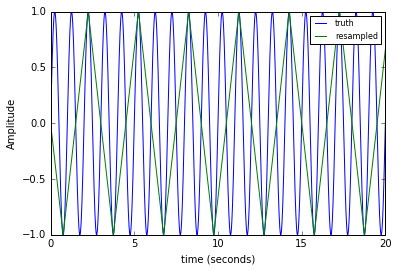

In [66]:
tmax = 100*np.pi
Npts = int(tmax*100)
x = np.linspace(0., tmax, Npts)
fsignal = 1
signal = np.sin(x*fsignal*2*np.pi)
    
#resample at lower freq
reduction_factor = 75
sampling_rate = (Npts/reduction_factor) / tmax
sample = signal[0::reduction_factor]

plt.plot(x, signal, label='truth');
plt.plot(x[0::reduction_factor], sample, label='resampled')
plt.xlabel('time (seconds)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right', fontsize=8)
plt.xlim([0,20])

In [67]:
#calc ground truth fft
power_real = 2*np.sqrt(np.fft.fft(signal*np.hanning(Npts))/Npts)
freq = np.fft.fftfreq(Npts, tmax/Npts)

#calculate resampled fft
Npts_sample = len(sample)
power_sample = 2*np.sqrt(np.fft.fft(sample*np.hanning(Npts_sample))/Npts_sample)
freq_sample = np.fft.fftfreq(Npts_sample, tmax/float(Npts_sample))

#aliased freq
N = round(fsignal/sampling_rate)              #cycles/sample
f_alias = np.abs(fsignal - N*sampling_rate)

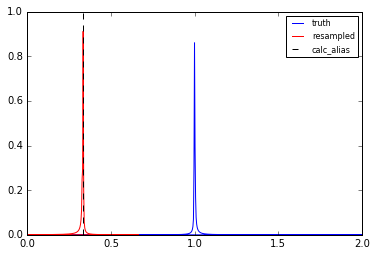

In [68]:
plt.plot(freq,power_real, label='truth')
plt.plot(freq_sample,power_sample, 'r', ms=10,label='resampled')
plt.plot([f_alias, f_alias],[0,1],'k--',label='calc_alias')
plt.legend(fontsize=8)
plt.xlim([0,2]);